In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("poster")

In [2]:
url = "https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv"

df= pd.read_csv(url, header=None,usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.head(3)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36


In [3]:
df["Class label"].unique()

array([1, 2, 3], dtype=int64)

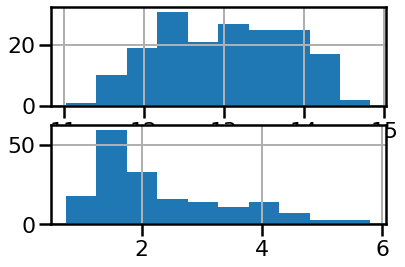

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,(ax1,ax2) = plt.subplots(2,1)
df["Alcohol"].hist(ax=ax1)
df["Malic acid"].hist(ax=ax2)

As we can see in the table above, the features Alcohol (percent/volumne) and Malic acid (g/l) are measured on different scales, so that Feature Scaling is necessary important prior to any comparison or combination of these data.

In [5]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [6]:
print ( f"Mean and standard deviation after standarization: \nMean= {round(df_std[:,0].mean(),2)}, Standar= {df_std[:,0].std()}")
print(f"\nMax value and min_value: \nMax= {df_minmax[:,0].max()}, Min={df_minmax[:,0].min()}")

Mean and standard deviation after standarization: 
Mean= -0.0, Standar= 1.0

Max value and min_value: 
Max= 1.0, Min=0.0


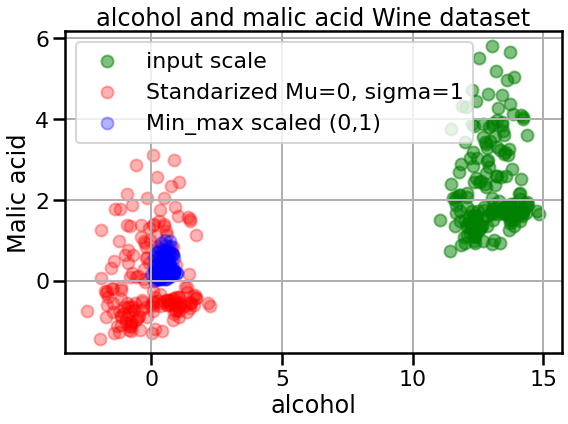

In [7]:
# plotting
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
                color="green", label="input scale", alpha=0.5)
    plt.scatter(df_std[:,0],df_std[:,1], color="red",
                label="Standarized Mu=0, sigma=1", alpha=0.3)
    plt.scatter(df_minmax[:,0], df_minmax[:,1], color="blue",
                label="Min_max scaled (0,1)", alpha=0.3)
    plt.title("alcohol and malic acid Wine dataset")
    plt.xlabel("alcohol")
    plt.ylabel("Malic acid")
    plt.legend(loc="upper left")
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [8]:
# aqui podemos realizar grafica con los diferentes claster (hacer tres scatter con clases vinos en diferentes colores)

In [9]:
#The effect of standardization on PCA in a pattern classification task
from sklearn.model_selection import train_test_split
X_wine = df.values[:,1:]
y_wine = df.values[:,0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_wine,y_wine, test_size=0.30, random_state=12345)

In [11]:
#linear regresion on a categorical variable using one hot encoder and dummy code
import pandas as pd
from sklearn import linear_model
# dataset rental prices in differentes citys

df = pd.DataFrame({
                'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC',
                'Seattle', 'Seattle', 'Seattle'],
                'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]
})

df.Rent.mean()

3333.3333333333335

In [12]:
# convert categorical variables to one hot encoding and fit a lineal model
one_hot_df = pd.get_dummies(df, prefix=["city"])
one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(one_hot_df[["city_NYC","city_SF","city_Seattle"]], one_hot_df["Rent"])
display (model.coef_ , model.intercept_)

array([ 166.66666667,  666.66666667, -833.33333333])

3333.3333333333335

In [14]:
# categorical data exercises
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\vgsales.csv"
vg_df = pd.read_csv(url, encoding="utf-8")
vg_df[["Name","Platform","Year","Genre","Publisher"]].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [15]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
print("Porcentaje de valores nulos en cada columna")
print("___________________________________________")
vg_df.isnull().sum() / len(vg_df)  * 100

Porcentaje de valores nulos en cada columna
___________________________________________


Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [17]:
# fillna Nan with "UNknow"
vg_df["Publisher"].fillna("Unknow", inplace=True)

In [18]:
vg_df["Year"].fillna(method="backfill", inplace=True)

In [19]:
vg_df["Year"] = vg_df["Year"].astype("int64")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

vg_df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)

UsageError: Line magic function `%matplotlib.inline` not found.


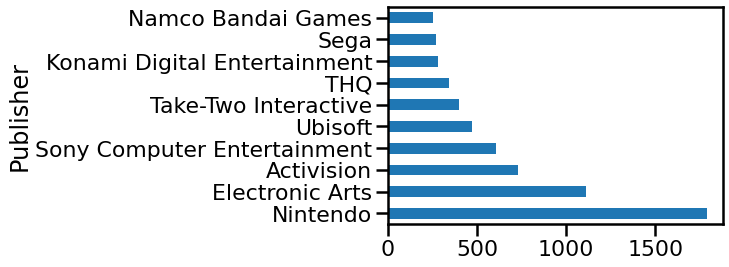

In [21]:
vg_df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10).plot.barh()
plt.show()


In [22]:
nintendo = vg_df[vg_df["Publisher"] == "Nintendo"]
electronic_art = vg_df[vg_df["Publisher"] == "Electronic Arts"]



In [23]:
nintendo_year =nintendo.sort_values(by="Year", ascending=True)

In [24]:
electronic_year = electronic_art.sort_values(by="Year", ascending=True)

No handles with labels found to put in legend.


<Figure size 576x648 with 0 Axes>

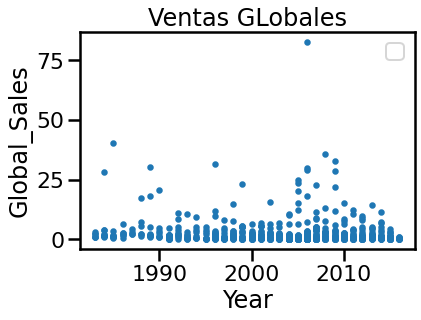

In [25]:
plt.figure(figsize=(8,9))
nintendo_year.plot(kind="scatter",x="Year", y="Global_Sales")
plt.title("Ventas GLobales")
plt.legend(loc='upper right')
plt.show()

In [26]:
#unique values for genre
genre = np.unique(vg_df["Genre"])
genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
#creating instance of labelencoder
labelencoder = LabelEncoder()
# assigning numerical values and storing in another column
vg_df["Genre_label"] = labelencoder.fit_transform(vg_df["Genre"])
vg_df.head(4)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_label
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10


In [28]:
# mapping genre and values
vg_df[["Genre_label","Genre"]].drop_duplicates("Genre").sort_values(by="Genre_label",ascending=True)

,Genre_label,Genre
16,0,Action
50,1,Adventure
39,2,Fighting
7,3,Misc
1,4,Platform
5,5,Puzzle
2,6,Racing
4,7,Role-Playing
9,8,Shooter
10,9,Simulation


In [29]:
pok = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Pokemon_clase.csv"
pok_df = pd.read_csv(pok, encoding="utf-8")
pok_df = pok_df.sample(random_state=1, frac=1).reset_index(drop=True)
pok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null object
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


In [30]:
# unique values generation
np.unique(pok_df["Generation"]) 

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [31]:
from sklearn.preprocessing import OneHotEncoder

# transform and map pokemon generations with LabelEncoder
# transform and map pokemon legendary status with Label Encoder

# manualmente con map 
map = {"Gen 1":1,"Gen 2":2,"Gen 3":3,"Gen 4":4,"Gen 5":5,"Gen 6":6}
pok_df["Gen_map"] = pok_df["Generation"].map(map)

In [32]:
pok_df[['Name', 'Generation', 'Legendary',"Gen_map"]].iloc[4:10]

,Name,Generation,Legendary,Gen_map
4,Octillery,Gen 2,False,2
5,Helioptile,Gen 6,False,6
6,Dialga,Gen 4,True,4
7,DeoxysDefense Forme,Gen 3,True,3
8,Rapidash,Gen 1,False,1
9,Swanna,Gen 5,False,5


In [33]:
 gen_le = LabelEncoder()
 pok_df["Gen_label"] = gen_le.fit_transform(pok_df["Generation"])

 leg_le = LabelEncoder()
 pok_df["Lgnd_label"] = leg_le.fit_transform(pok_df["Legendary"])

 pok_df[['Name', 'Generation', 'Legendary',"Gen_map","Gen_label","Lgnd_label"]].iloc[4:10]

,Name,Generation,Legendary,Gen_map,Gen_label,Lgnd_label
4,Octillery,Gen 2,False,2,1,0
5,Helioptile,Gen 6,False,6,5,0
6,Dialga,Gen 4,True,4,3,1
7,DeoxysDefense Forme,Gen 3,True,3,2,1
8,Rapidash,Gen 1,False,1,0,0
9,Swanna,Gen 5,False,5,4,0


In [34]:
pok_df_sub = pok_df[['Name', 'Generation', 'Gen_label', 'Legendary', 'Lgnd_label']]

In [35]:
# encode generation label using one hot encoder
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(pok_df[["Gen_label"]]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr,columns=gen_feature_labels)


In [36]:
pok_df_ohe = pd.concat([pok_df_sub, gen_features], axis=1)
pok_df_ohe.iloc[4:10]

,Name,Generation,Gen_label,Legendary,Lgnd_label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,1,False,0,0.0,1.0,0.0,0.0,0.0,0.0
5,Helioptile,Gen 6,5,False,0,0.0,0.0,0.0,0.0,0.0,1.0
6,Dialga,Gen 4,3,True,1,0.0,0.0,0.0,1.0,0.0,0.0
7,DeoxysDefense Forme,Gen 3,2,True,1,0.0,0.0,1.0,0.0,0.0,0.0
8,Rapidash,Gen 1,0,False,0,1.0,0.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,4,False,0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# get dummies
gen_onehot_features = pd.get_dummies(pok_df["Generation"])
pd.concat([pok_df[["Name","Generation"]],gen_onehot_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,0,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,0,1
6,Dialga,Gen 4,0,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,0,1,0,0,0
8,Rapidash,Gen 1,1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,0,1,0


### Data wrangling

In [38]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\telecom_churn.csv"
data1 = pd.read_csv(url)
data1.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [39]:
columns = data1.columns.values.tolist()

In [40]:
def choice_column(a):
    numero = np.random.choice(len(a), size=1)[0]
    return columns[numero]

In [41]:
choice_column(columns)

'Total intl charge'

### Text preprocessing

In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
text = r"C:\Users\gonza\Downloads\bbc-text.csv"
text_df = pd.read_csv(text)
text_df.head(3)

FileNotFoundError: [Errno 2] File b'C:\\Users\\gonza\\Downloads\\bbc-text.csv' does not exist: b'C:\\Users\\gonza\\Downloads\\bbc-text.csv'

In [2]:
## create feature transformers for unigrams, bigrams, and trigrams
bow_converter = CountVectorizer()
bigram_converter = CountVectorizer(ngram_range=(2,2))
trigram_converter = CountVectorizer(ngram_range=(3,3))

In [3]:
## fit the transformer and look the vocabulary size
bow_converter.fit(text_df["text"])
words = bow_converter.get_feature_names()
bigram_converter.fit(text_df["text"])
bigrams = bigram_converter.get_feature_names()
trigram_converter.fit(text_df["text"])
trigrams = trigram_converter.get_feature_names()

print(len(words),len(bigrams),len(trigrams))

29421 330496 616317


In [4]:
## sneak a peek at the n-grams themselves
print(words[:10])

['00', '000', '0001', '000bn', '000m', '000s', '000th', '001', '001and', '001st']


In [5]:
print(bigrams[:10])

['00 59', '00 and', '00 for', '00 mark', '00 per', '00 qualifying', '000 000', '000 12', '000 130', '000 131']


In [6]:
print(trigrams[:10])

['00 59 000', '00 and an', '00 for work', '00 mark there', '00 per minute', '00 qualifying mark', '000 000 000', '000 000 bytes', '000 12 000', '000 12 700']


In [9]:
import nltk
stemmer = nltk.stem.porter.PorterStemmer()
m = stemmer.stem("flowers")
m

'flower'

In [11]:
import re
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'animals', 'weather', 'animals']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({"Document":corpus,"Category":labels})
corpus_df = corpus_df[["Document","Category"]]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,The brown fox is quick and the blue dog is lazy!,animals
4,The sky is very blue and the sky is very beaut...,weather
5,The dog is lazy but the brown fox is quick!,animals


In [18]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words("english")

def normalize_document(doc):
    #lower case and remove especial charateres/whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    print(tokens)
    # filter stopwords out of the document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    print(filtered_tokens)
    doc = " ".join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)


In [16]:
corpus

array(['The sky is blue and beautiful.',
       'Love this blue and beautiful sky!',
       'The quick brown fox jumps over the lazy dog.',
       'The brown fox is quick and the blue dog is lazy!',
       'The sky is very blue and the sky is very beautiful today',
       'The dog is lazy but the brown fox is quick!'], dtype='<U56')

In [19]:
frase = 'The sky is blue and beautiful.'
normalize_document(frase)

['the', 'sky', 'is', 'blue', 'and', 'beautiful']
['sky', 'blue', 'beautiful']


'sky blue beautiful'

In [20]:
frase2 ="They indicate sentiment, which can be very valuable information to a data\
        scientist. So, ideally, we’d like a representation that highlights meaningful words"
normalize_document(frase2)

['they', 'indicate', 'sentiment', 'which', 'can', 'be', 'very', 'valuable', 'information', 'to', 'a', 'data', 'scientist', 'so', ',', 'ideally', ',', 'we', '’', 'd', 'like', 'a', 'representation', 'that', 'highlights', 'meaningful', 'words']
['indicate', 'sentiment', 'valuable', 'information', 'data', 'scientist', ',', 'ideally', ',', '’', 'like', 'representation', 'highlights', 'meaningful', 'words']


'indicate sentiment valuable information data scientist , ideally , ’ like representation highlights meaningful words'

In [21]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

['the', 'sky', 'is', 'blue', 'and', 'beautiful']
['sky', 'blue', 'beautiful']
['the', 'sky', 'is', 'blue', 'and', 'beautiful']
['sky', 'blue', 'beautiful']
['love', 'this', 'blue', 'and', 'beautiful', 'sky']
['love', 'blue', 'beautiful', 'sky']
['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
['the', 'brown', 'fox', 'is', 'quick', 'and', 'the', 'blue', 'dog', 'is', 'lazy']
['brown', 'fox', 'quick', 'blue', 'dog', 'lazy']
['the', 'sky', 'is', 'very', 'blue', 'and', 'the', 'sky', 'is', 'very', 'beautiful', 'today']
['sky', 'blue', 'sky', 'beautiful', 'today']
['the', 'dog', 'is', 'lazy', 'but', 'the', 'brown', 'fox', 'is', 'quick']
['dog', 'lazy', 'brown', 'fox', 'quick']


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog', 'brown fox quick blue dog lazy',
       'sky blue sky beautiful today', 'dog lazy brown fox quick'],
      dtype='<U30')

### Feature Engineering and Feature Selection (mlcourse.ai)

In [2]:
import json

with open (r"C:\Users\gonza\Downloads\Two Sigma Connect data\train.json\train.json","r") as raw_data:
    data = json.load(raw_data)
    df = pd.DataFrame(data)

1. Feature Extraction¶

In practice, data rarely comes in the form of ready-to-use matrices. That's why every task begins with feature extraction. Sometimes, it can be enough to read the csv file and convert it into numpy.array, but this is a rare exception. Let's look at some of the popular types of data from which features can be extracted.

In [3]:
# text
from functools import reduce

texts = [['i', 'have', 'a', 'cat'], 
        ['he', 'have', 'a', 'dog'], 
        ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]
dictionary = list(enumerate(set(list(reduce(lambda x,y: x+y,texts)))))

In [4]:
dictionary

[(0, 'cat'),
 (1, 'he'),
 (2, 'and'),
 (3, 'i'),
 (4, 'dog'),
 (5, 'have'),
 (6, 'a')]

In [10]:
def vectorize(text):
    vector = np.zeros(len(dictionary))
    for i,word in dictionary:
        num = 0
        for w in text:
            if w == word:
                num +=1
        if num:
            vector[i] = num
    return vector

for t in texts:
    print(vectorize(t))
        

[1. 0. 0. 1. 0. 1. 1.]
[0. 1. 0. 0. 1. 1. 1.]
[1. 1. 2. 1. 1. 1. 2.]


This is an extremely naive implementation. In practice, you need to consider stop words, the maximum length of the dictionary, more efficient data structures (usually text data is converted to a sparse vector), etc.

When using algorithms like Bag of Words, we lose the order of the words in the text, which means that the texts "i have no cows" and "no, i have cows" will appear identical after vectorization when, in fact, they have the opposite meaning. To avoid this problem, we can revisit our tokenization step and use N-grams (the sequence of N consecutive tokens) instead.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,1))
vect.fit_transform(["no i have cows", "i have no cows"]).toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [15]:
vect.vocabulary_

{'no': 2, 'have': 1, 'cows': 0}

In [16]:
vect = CountVectorizer(ngram_range=(1,2))
vect.fit_transform(["no i have cows", "i have no cows"]).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0]], dtype=int64)

In [17]:
vect.vocabulary_

{'no': 4,
 'have': 1,
 'cows': 0,
 'no have': 6,
 'have cows': 2,
 'have no': 3,
 'no cows': 5}

Also note that one does not have to use only words. In some cases, it is possible to generate N-grams of characters. This approach would be able to account for similarity of related words or handle typos.

In [18]:
from scipy.spatial.distance import euclidean
vect = CountVectorizer(ngram_range=(3,3), analyzer="char_wb")
n1,n2,n3,n4 = vect.fit_transform(['andersen', 'petersen', 'petrov', 'smith']).toarray()
euclidean(n1,n2),euclidean(n2,n3),euclidean(n3,n4)

(2.8284271247461903, 3.1622776601683795, 3.3166247903554)

### Ejercicio mlcourse

In [2]:
import json

with open (r"C:\Users\gonza\Downloads\Two Sigma Connect data\train.json\train.json","r") as raw_data:
    data = json.load(raw_data)
    df = pd.DataFrame(data)

In [3]:
df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 7.3+ MB


In [41]:
df["interest_level"].unique()

array(['medium', 'low', 'high'], dtype=object)

In [42]:
dict = {"medium":1,"low":2,"high":3}
df["interest_level"] = df["interest_level"].replace(dict)

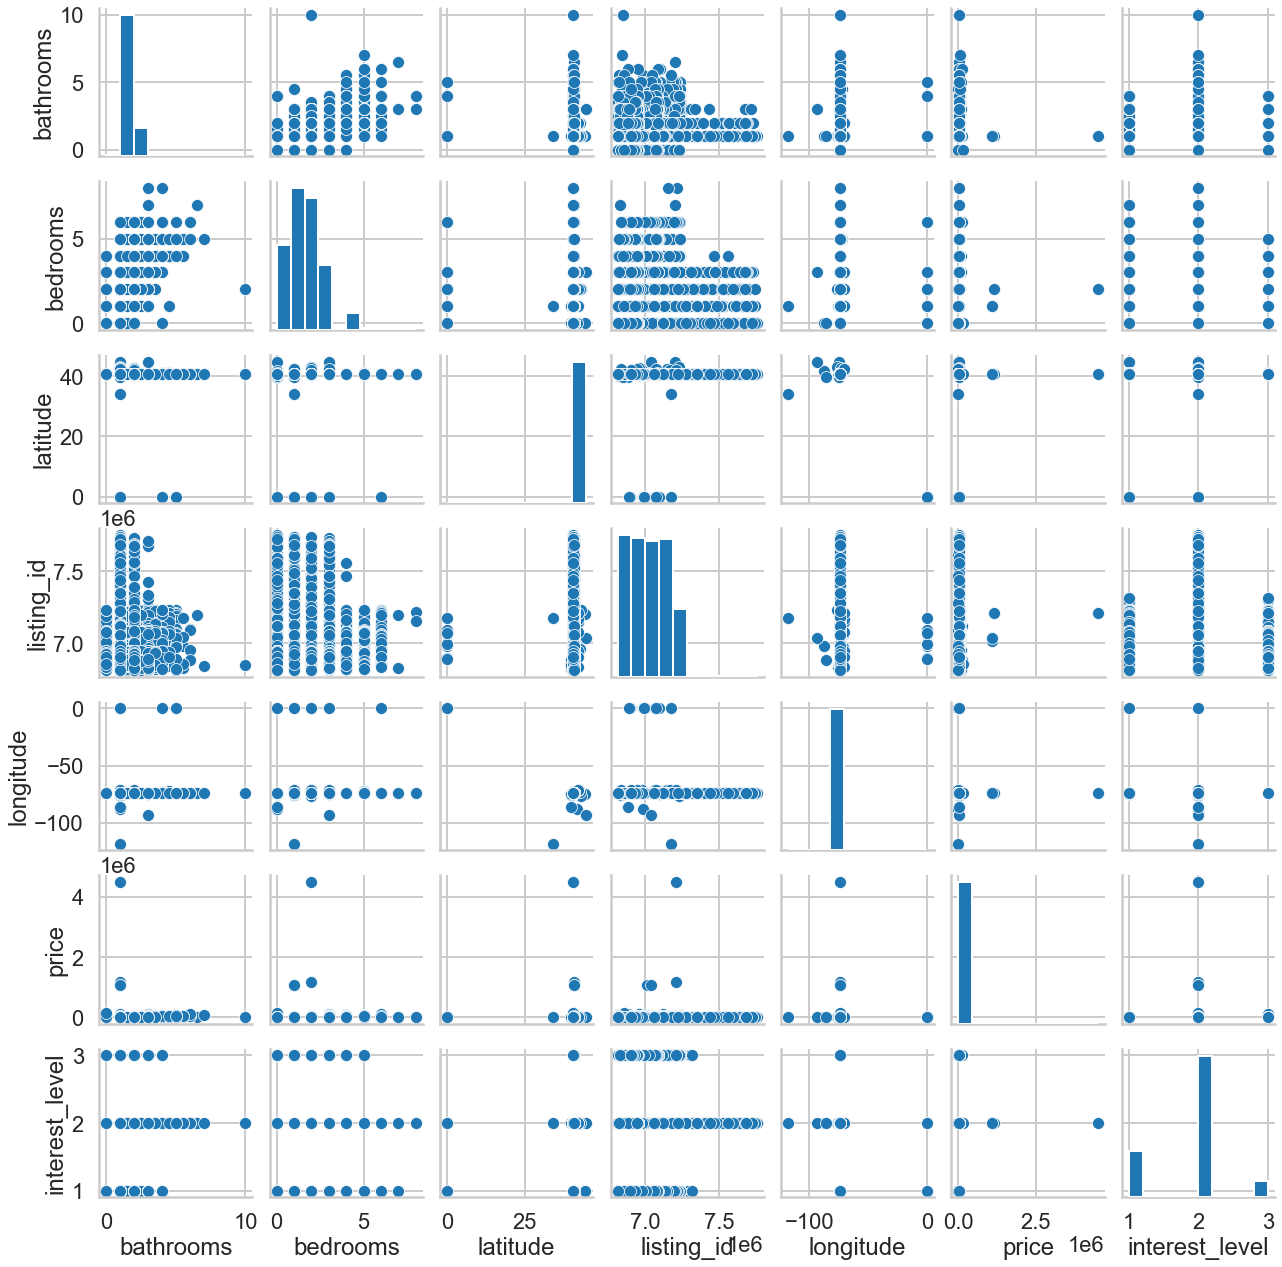

In [45]:
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'png'
var_num = [var for var in df.columns if df[var].dtype !="object"]
sns.pairplot(df[var_num])

In [44]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,interest_level
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04,49352.000000
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03,1.850259
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04,0.531884
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01,1.000000
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03,2.000000
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03,2.000000
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03,2.000000
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06,3.000000


In [46]:
df_num = df.loc[:,var_num]

In [47]:
df_num.head()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,interest_level
4,1.0,1,40.7108,7170325,-73.9539,2400,1
6,1.0,2,40.7513,7092344,-73.9722,3800,2
9,1.0,2,40.7575,7158677,-73.9625,3495,1
10,1.5,3,40.7145,7211212,-73.9425,3000,1
15,1.0,0,40.7439,7225292,-73.9743,2795,2


In [57]:
df_num["longitude"] = abs(df["longitude"])

In [58]:
X = df_num.drop("interest_level",axis=1)
y = df_num["interest_level"]

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Decision trees with depth = 2
trans = RobustScaler(with_centering=False, with_scaling=True)
model = DecisionTreeClassifier(max_depth=2, random_state=42)
pipeline = Pipeline([("t",trans),("m",model)])
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=0)
n_scores = cross_val_score(pipeline,X,y,scoring="accuracy",cv=cv,n_jobs=1)

print(f'Accuracy: {np.mean(n_scores)}, {np.std(n_scores)}')


Accuracy: 0.6961352690322654, 0.001988226200245713


In [62]:
# If you are using data for classification use Decision Trees (CART, Random Forest, XgBoost.. etc). As decision trees are split by purity so they don't get affected by outliers like median.
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(max_depth=2, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=0)
n_scores = cross_val_score(model,X,y,scoring="neg_log_loss",cv=cv,n_jobs=1)

print(f'log_loss: {np.mean(n_scores)}, {np.std(n_scores)}')

log_loss: -0.7554950391107409, 0.0018663178346543096


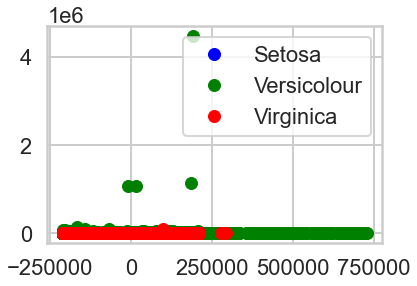

In [61]:
from sklearn import decomposition
# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 3, 0], X_pca[y == 3, 1], 'ro', label='Virginica')
plt.legend(loc=0);

### Limpieza de datos

In [2]:
url = "https://raw.githubusercontent.com/realpython/python-data-cleaning/master/Datasets/BL-Flickr-Images-Book.csv"
df = pd.read_csv(url)
df.head(3)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.


In [3]:
to_drop = ['Edition Statement',
           'Corporate Author',
            'Corporate Contributors',
            'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
          'Shelfmarks']
df.drop(to_drop,axis=1,inplace=True)

In [4]:
# cambiar indidce (usaremos una columna, primero comprobamos que todos sean valores unicos)
df["Identifier"].is_unique

True

In [5]:
df = df.set_index("Identifier")
df.head(3)

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...


In [6]:
# podemos acceder a cualquier indice con loc e iloc
df.loc[206]

Place of Publication                                               London
Date of Publication                                           1879 [1878]
Publisher                                                S. Tinsley & Co.
Title                                   Walter Forbes. [A novel.] By A. A
Author                                                              A. A.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 206, dtype: object

In [9]:
# vamos hacer mas limpieza , por ejemplo con las fechas
df.loc[1905:,"Date of Publication"].head(10)

Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
2957           1873
3017           1866
3131           1899
4598           1814
4884           1820
Name: Date of Publication, dtype: object

A particular book can have only one date of publication. Therefore, we need to do the following:

* Remove the extra dates in square brackets, wherever present: 1879 [1878]
* Convert date ranges to their “start date”, wherever present: 1860-63; 1839, 38-54
* Completely remove the dates we are not certain about and replace them with NumPy’s NaN: [1897?]
* Convert the string nan to NumPy’s NaN value

In [ ]:
# usaremos regex para extraer los 4 primeros digitos de la tabla

In [11]:
ejemplo = "1948,[35,36]"
pd.to_numeric(ejemplo[:4])

1948

The \d represents any digit, and {4} repeats this rule four times. The ^ character matches the start of a string, and the parentheses denote a capturing group, which signals to Pandas that we want to extract that part of the regex. (We want ^ to avoid cases where [ starts off the string.)

In [12]:
extr = df["Date of Publication"].str.extract(r'^(\d{4})',expand=False)
extr.head(3)

Identifier
206    1879
216    1868
218    1869
Name: Date of Publication, dtype: object

In [13]:
 df["Date of Publication"] = pd.to_numeric(extr)
 df["Date of Publication"].dtype

dtype('float64')

In [14]:
#This results in about one in every ten values being missing, which is a small price to pay for now being able to do computations on the remaining valid values
df["Date of Publication"].isna().sum() / len(df)

0.11717147339205986

### Combining str Methods with NumPy to Clean Columns

In [16]:
pub = df['Place of Publication']
london = pub.str.contains("London")
london[:5]

Identifier
206    True
216    True
218    True
472    True
480    True
Name: Place of Publication, dtype: bool

In [17]:
oxford = pub.str.contains("Oxford")
# combinamos ambos
df['Place of Publication'] = np.where(london,"London",
                                np.where(oxford,"Oxford",
                                pub.str.replace("-"," ")))

df['Place of Publication'].head(5)

Identifier
206    London
216    London
218    London
472    London
480    London
Name: Place of Publication, dtype: object

Note: At this point, Place of Publication would be a good candidate for conversion to a Categorical dtype, because we can encode the fairly small unique set of cities with integers. (The memory usage of a Categorical is proportional to the number of categories plus the length of the data; an object dtype is a constant times the length of the data.)

### Cleaning the Entire Dataset Using the applymap Function
There are some instances where it would be helpful to apply a customized function to each cell or element of a DataFrame. Pandas .applymap() method is similar to the in-built map() function and simply applies a function to all the elements in a DataFrame.

In [19]:
url = r"C:\Users\gonza\Downloads\university_towns.txt"

university_towns = []
with open(url) as file:
    for line in file:
        if "[edit]" in line:
            # remember this state until the next is found
            state = line
        else:
            # otherwise we have a city
           university_towns.append((state,line))

university_towns[:5]


[('Alabama[edit]\n', 'Auburn (Auburn University)[1]\n'),
 ('Alabama[edit]\n', 'Florence (University of North Alabama)\n'),
 ('Alabama[edit]\n', 'Jacksonville (Jacksonville State University)[2]\n'),
 ('Alabama[edit]\n', 'Livingston (University of West Alabama)[2]\n'),
 ('Alabama[edit]\n', 'Montevallo (University of Montevallo)[2]\n')]

In [24]:
primer = university_towns[0]
primer[0].split("[")[0]

'Alabama'

In [25]:
# creamos un dataframe
towns_df = pd.DataFrame(university_towns,columns=["State","RegionName"])
towns_df.head(3)

,State,RegionName
0,Alabama[edit]\n,Auburn (Auburn University)[1]\n
1,Alabama[edit]\n,Florence (University of North Alabama)\n
2,Alabama[edit]\n,Jacksonville (Jacksonville State University)[2]\n


In [30]:
# creamos una funcion para extrar el estado y la ciudad
def get_citystate(item):
    if " (" in item:
        return item[:item.find(" (")]
    elif "[" in item:
        return item[:item.find("[")]
    else:
        return item


In [31]:
 # usamos applymap para todo el call
 towns_df = towns_df.applymap(get_citystate)
 towns_df.head(3)

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
